In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
heart_study = pd.read_csv("Resources/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv",dtype={"Year": "str"})

In [3]:
heart_study.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [4]:
heart_study.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [5]:
# Dropping columns our group determined is insignificant to our analysis
heart_study.drop(["GeographicLevel",
                  "DataSource",
                  "Class",
                  "Data_Value_Unit",
                  "Data_Value_Type",
                  "Data_Value_Footnote_Symbol",
                  "Data_Value_Footnote",
                  "StratificationCategory1",
                  "StratificationCategory2",
                  "StratificationCategory3",
                  "LocationID"], axis = 1, inplace = True)

# Renaming columns accordingly
heart_study.rename(columns={
    "LocationAbbr": "State",
    "LocationDesc": "County",
    "Stratification1": "Age Group",
    "Stratification2": "Ethnicity",
    "Stratification3": "Sex"
},
    inplace=True)

heart_study.head()

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
0,1999,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [6]:
heart_study.shape

(5770240, 10)

In [7]:
heart_study["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017', '1999 - 2010',
       '2010 - 2019'], dtype=object)

In [8]:
# Dropping rows containing "1999-2010" and "2010-2019"
heart_study_cleaned = heart_study[(heart_study.Year != "1999 - 2010") & (heart_study.Year != "2010 - 2019")]
heart_study_cleaned["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017'], dtype=object)

In [9]:
# Dropping rows that contain missing values
heart_study_cleaned = heart_study_cleaned.dropna(0)

heart_study_cleaned

/Users/seanguzman/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
53,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall
79,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men
106,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,465.9,704.8,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,466.8,706.1,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,458.2,719.7,Ages 65 years and older,White,Overall


In [10]:
heart_study_year = heart_study_cleaned.groupby(["Year"]).mean()
heart_study_year

,Data_Value,Confidence_limit_Low,Confidence_limit_High
Year,,,
1999,654.378824,563.267758,761.907737
2000,637.858300,556.334273,732.994773
2001,617.989555,541.885747,706.329304
2002,608.264816,534.245364,694.097351
2003,589.616238,516.639549,674.314532
2004,550.562482,483.782313,627.901447
2005,539.879701,474.494108,615.581625
2006,508.711408,446.679683,580.564862
2007,487.687681,428.683872,555.936549


In [11]:
nj_study = heart_study_cleaned.loc[(heart_study_cleaned["State"] == "NJ") &
                                   (heart_study_cleaned["Ethnicity"] == "Overall"), :]
nj_study

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
2961036,2000,NJ,Bergen,All stroke,9.4,7.9,11.2,Ages 35-64 years,Overall,Women
2961284,2014,NJ,Bergen,All stroke,5.8,5.0,6.9,Ages 35-64 years,Overall,Women
2961313,2015,NJ,Bergen,All stroke,5.4,4.6,6.4,Ages 35-64 years,Overall,Women
2961399,2001,NJ,Bergen,All stroke,8.4,7.2,10.2,Ages 35-64 years,Overall,Women
2961507,1999,NJ,Bergen,All stroke,9.1,7.4,11.0,Ages 35-64 years,Overall,Women
...,...,...,...,...,...,...,...,...,...,...
3005097,2009,NJ,Warren,Heart failure,418.8,362.2,475.4,Ages 65 years and older,Overall,Men
3005098,2001,NJ,Warren,Heart failure,529.1,458.8,603.2,Ages 65 years and older,Overall,Men
3005099,2000,NJ,Warren,Heart failure,569.2,487.7,655.4,Ages 65 years and older,Overall,Men
3005100,2006,NJ,Warren,Heart failure,435.4,385.3,498.0,Ages 65 years and older,Overall,Men


In [12]:
nj_study["Topic"].unique()

array(['All stroke', 'Heart failure', 'All heart disease',
       'Coronary heart disease (CHD)', 'Cardiovascular disease (CVD)'],
      dtype=object)

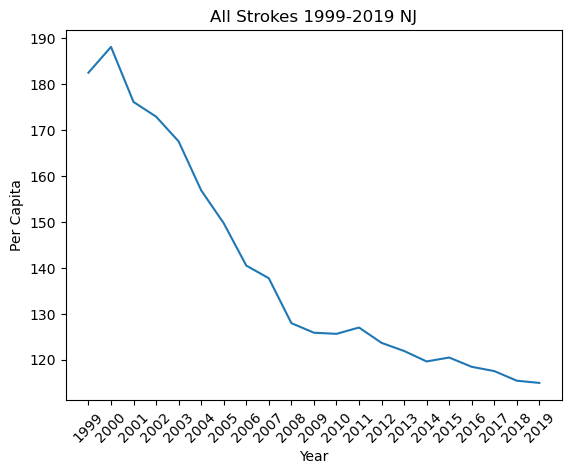

In [23]:
nj_all_stroke = nj_study.loc[nj_study["Topic"] == "All stroke"].groupby("Year").mean()
nj_all_stroke = nj_all_stroke.reset_index()
plt.plot(nj_all_stroke["Year"], nj_all_stroke["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("All Strokes 1999-2019 NJ")
plt.show()

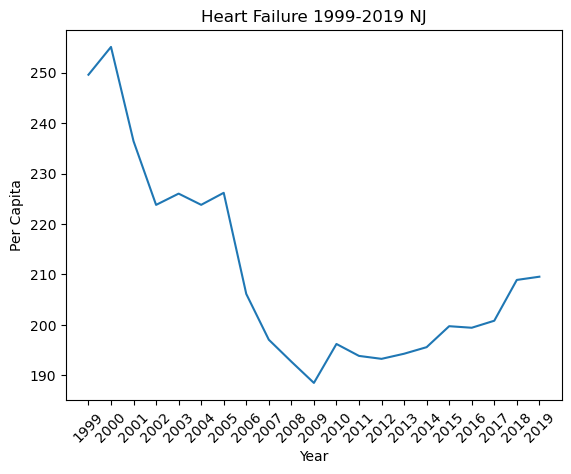

In [22]:
nj_heart_failure = nj_study.loc[nj_study["Topic"] == "Heart failure"].groupby("Year").mean()
nj_heart_failure = nj_heart_failure.reset_index()
plt.plot(nj_heart_failure["Year"], nj_heart_failure["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Failure 1999-2019 NJ")
plt.show()

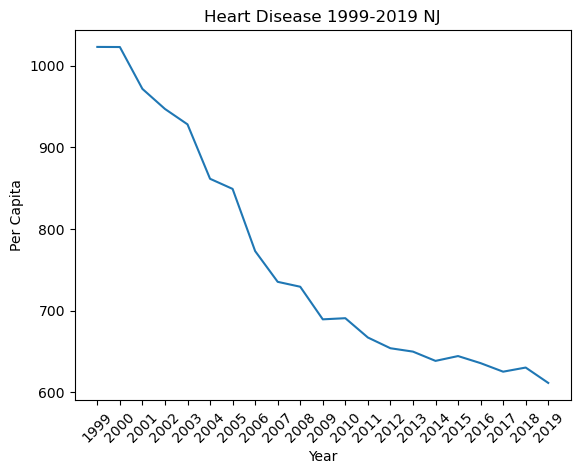

In [24]:
nj_heart_disease = nj_study.loc[nj_study["Topic"] == "All heart disease"].groupby("Year").mean()
nj_heart_disease = nj_heart_disease.reset_index()
plt.plot(nj_heart_disease["Year"], nj_heart_disease["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Disease 1999-2019 NJ")
plt.show()

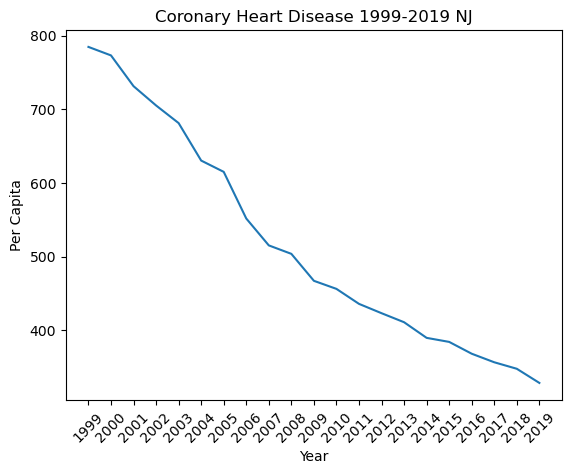

In [25]:
nj_coronary = nj_study.loc[nj_study["Topic"] == "Coronary heart disease (CHD)"].groupby("Year").mean()
nj_coronary = nj_coronary.reset_index()
plt.plot(nj_coronary["Year"], nj_coronary["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Coronary Heart Disease 1999-2019 NJ")
plt.show()

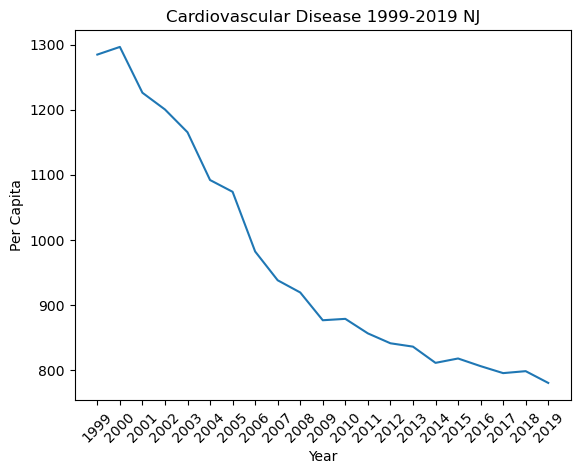

In [26]:
nj_cardiovascular = nj_study.loc[nj_study["Topic"] == "Cardiovascular disease (CVD)"].groupby("Year").mean()
nj_cardiovascular = nj_cardiovascular.reset_index()
plt.plot(nj_cardiovascular["Year"], nj_cardiovascular["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Cardiovascular Disease 1999-2019 NJ")
plt.show()

In [187]:
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county = nj_by_county.unstack()
nj_by_county = nj_by_county.T

nj_by_county

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,,,,,,,,,,,,
Atlantic,741.006667,802.100000,768.306667,750.036667,765.923333,705.653333,674.213333,594.873333,560.886667,544.436667,...,508.210000,506.046667,479.446667,477.140000,484.996667,490.756667,491.760000,482.546667,479.596667,454.843333
Bergen,642.330000,632.936667,588.116667,585.593333,548.466667,503.983333,498.413333,465.166667,435.990000,433.643333,...,403.103333,384.896667,371.636667,376.856667,362.120000,359.180000,352.096667,343.203333,337.813333,339.313333
Burlington,707.880000,711.336667,674.170000,663.763333,650.206667,612.000000,587.923333,515.093333,506.573333,490.583333,...,457.476667,440.973333,415.640000,406.666667,404.443333,429.040000,415.253333,414.183333,423.340000,420.636667
Camden,723.123333,722.950000,680.156667,669.280000,648.490000,596.856667,586.823333,540.233333,517.400000,502.043333,...,490.220000,492.620000,471.653333,472.196667,459.676667,455.316667,444.843333,451.726667,457.883333,443.516667
Cape May,635.543333,708.906667,680.360000,662.626667,670.926667,627.963333,686.823333,614.496667,565.006667,566.450000,...,533.123333,521.083333,516.050000,517.110000,499.003333,504.356667,514.390000,498.106667,491.683333,464.106667
Cumberland,808.433333,818.343333,791.993333,760.766667,768.050000,728.780000,730.710000,615.376667,573.200000,551.053333,...,544.753333,539.556667,536.413333,539.260000,539.226667,545.923333,538.966667,550.246667,529.860000,518.646667
Essex,695.220000,681.863333,658.393333,645.750000,610.356667,581.116667,563.873333,534.903333,514.160000,517.803333,...,493.110000,472.700000,448.253333,448.473333,415.773333,417.693333,407.296667,383.646667,389.800000,366.023333
Gloucester,718.893333,759.710000,719.690000,718.996667,716.363333,656.106667,654.110000,560.983333,516.093333,509.786667,...,482.623333,483.473333,480.370000,482.696667,466.006667,476.356667,482.740000,490.490000,499.556667,486.710000
Hudson,756.180000,715.266667,686.323333,677.306667,655.630000,636.146667,638.406667,586.680000,554.906667,553.556667,...,488.033333,469.126667,444.183333,440.540000,410.063333,391.683333,378.030000,360.030000,347.150000,327.850000


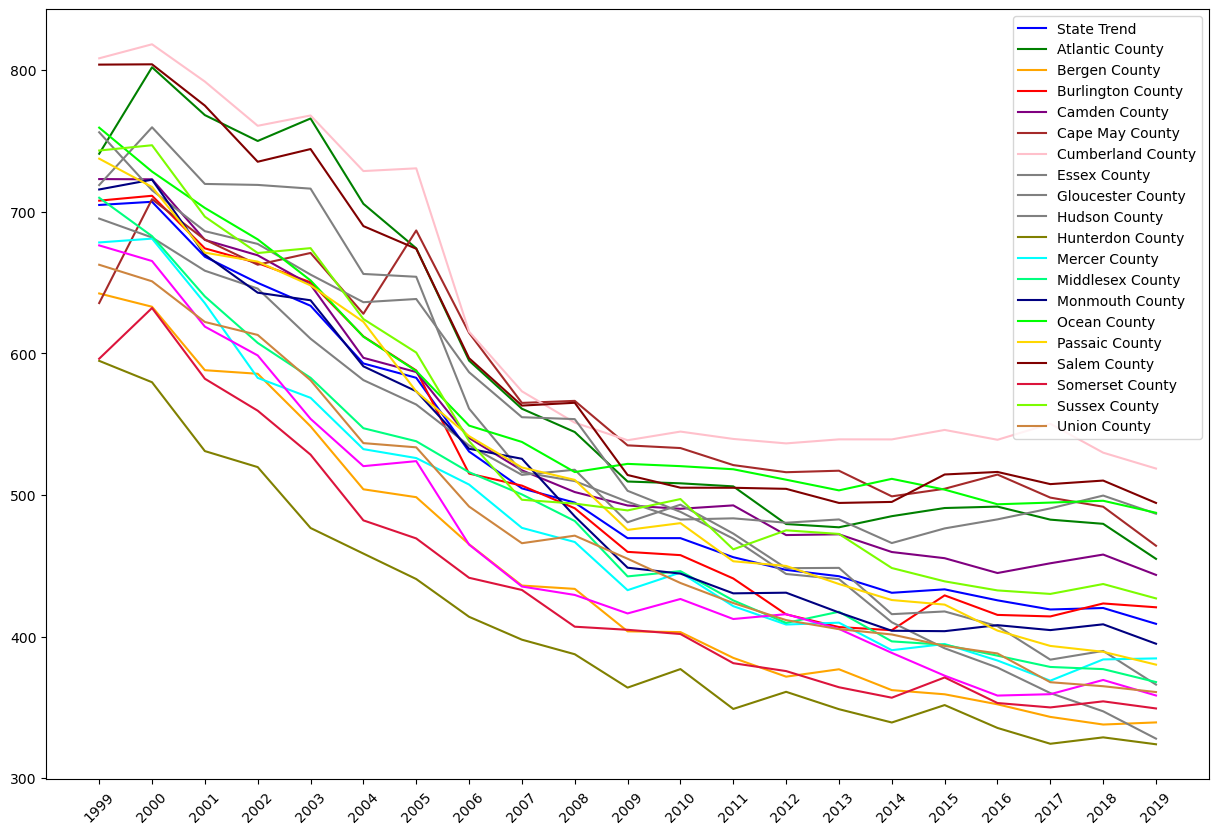

In [169]:
years = nj_by_county.keys()
state_trend = nj_by_county.mean()

plt.figure(figsize=(15,10))
nj_state, = plt.plot(years, state_trend, color="blue", label="State Trend" )

Atlantic, = plt.plot(years, nj_by_county.loc['Atlantic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="green",label="Atlantic County")
Bergen, = plt.plot(years, nj_by_county.loc['Bergen',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="orange",label="Bergen County")
Burlington, = plt.plot(years, nj_by_county.loc['Burlington',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="red",label="Burlington County")

Camden, = plt.plot(years, nj_by_county.loc['Camden',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="purple",label="Camden County")

CapeMay, = plt.plot(years, nj_by_county.loc['Cape May',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="brown",label="Cape May County")
Cumberland, = plt.plot(years, nj_by_county.loc['Cumberland',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="pink",label="Cumberland County")

Essex, = plt.plot(years, nj_by_county.loc['Essex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Essex County")

Gloucester, = plt.plot(years, nj_by_county.loc['Gloucester',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Gloucester County")

Hudson, = plt.plot(years, nj_by_county.loc['Hudson',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Hudson County")

Hunterdon, = plt.plot(years, nj_by_county.loc['Hunterdon',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="olive",label="Hunterdon County")
Mercer, = plt.plot(years, nj_by_county.loc['Mercer',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="cyan",label="Mercer County")
Middlesex, = plt.plot(years, nj_by_county.loc['Middlesex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="springgreen",label="Middlesex County")
Monmouth, = plt.plot(years, nj_by_county.loc['Monmouth',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="navy",label="Monmouth County")
Morris, = plt.plot(years, nj_by_county.loc['Morris',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="fuchsia",label="Morris County")
Ocean, = plt.plot(years, nj_by_county.loc['Ocean',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lime",label="Ocean County")
Passaic, = plt.plot(years, nj_by_county.loc['Passaic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gold",label="Passaic County")
Salem, = plt.plot(years, nj_by_county.loc['Salem',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="maroon",label="Salem County")
Somerset, = plt.plot(years, nj_by_county.loc['Somerset',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="crimson",label="Somerset County")
Sussex, = plt.plot(years, nj_by_county.loc['Sussex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lawngreen",label="Sussex County")
Union, = plt.plot(years, nj_by_county.loc['Union',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="peru",label="Union County")
plt.legend(handles=[nj_state, Atlantic, Bergen, Burlington, Camden, CapeMay, Cumberland, Essex, Gloucester,
                   Hudson,Hunterdon,Mercer,Middlesex,Monmouth,Ocean,Passaic,Salem,Somerset,Sussex,Union], loc="best")


plt.xticks(rotation=45)

plt.show()

In [179]:
chronic_df = pd.read_csv("Resources/U.S._Chronic_Disease_Indicators__CDI_.csv")
chronic_df.head()

/Users/seanguzman/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [180]:
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [181]:
# Dropping columns our group determined is insignificant to our analysis
chronic_df.drop(["YearStart",
                 "LocationDesc",
                 "DataSource",
                 "Response",
                 "DataValueFootnoteSymbol",
                 "DatavalueFootnote",
                 "Stratification1",
                 "StratificationCategory2",
                 "Stratification2",
                 "StratificationCategory3",
                 "Stratification3",
                 "ResponseID",
                 "LocationID",
                 "TopicID",
                 "QuestionID",
                 "DataValueTypeID",
                 "StratificationCategoryID1",
                 "StratificationID1",
                 "StratificationCategoryID2",
                 "StratificationID2",
                 "StratificationCategoryID3",
                 "StratificationID3"], axis = 1, inplace = True)

# Renaming columns accordingly
chronic_df.rename(columns={
    "YearEnd": "Year",
    "LocationAbbr": "State",
    "StratificationCategory1": "Ethnicity-Sex"
},
    inplace=True)

chronic_df.head()

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045)
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464)
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192)
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048)
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005)


In [184]:
smoking_df = chronic_df.loc[(chronic_df["Topic"] == "Tobacco") &
                            (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
smoking_df = smoking_df.groupby(["Year", "State"]).mean()

smoking_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             22.9                21.0                 25.0
     AL             24.3                22.9                 25.8
     AR             27.0                24.8                 29.2
     AZ             19.3                17.3                 21.4
     CA             13.7                12.9                 14.4
...                  ...                 ...                  ...
2021 VT             14.8                13.5                 16.2
     WA             10.7                10.0                 11.5
     WI             13.3                12.0                 14.7
     WV             22.0                20.7                 23.3
     WY             16.4                14.8                 18.2

[605 rows x 3 columns]

In [185]:
diabetes_df = chronic_df.loc[(chronic_df["Topic"] == "Diabetes") &
                            (chronic_df["Question"] == "Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
diabetes_df = diabetes_df.groupby(["Year", "State"]).mean()

diabetes_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             63.5                53.1                 72.8
     AL             56.1                51.5                 60.6
     AR             50.3                44.4                 56.3
     AZ             52.5                45.6                 59.2
     CA             58.8                53.2                 64.1
...                  ...                 ...                  ...
2021 VT              NaN                 NaN                  NaN
     WA              NaN                 NaN                  NaN
     WI             61.1                55.6                 66.3
     WV              NaN                 NaN                  NaN
     WY             55.9                49.8                 61.9

[605 rows x 3 columns]

In [186]:
obesity_df = chronic_df.loc[(chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                            (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
obesity_df = obesity_df.groupby(["Year", "State"]).mean()

obesity_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             27.4                25.3                 29.7
     AL             32.0                30.5                 33.5
     AR             30.9                28.8                 33.1
     AZ             25.1                23.0                 27.3
     CA             23.8                22.9                 24.7
...                  ...                 ...                  ...
2021 VT             29.0                27.4                 30.7
     WA             28.8                27.7                 29.9
     WI             33.9                32.1                 35.7
     WV             40.6                39.1                 42.1
     WY             32.0                29.9                 34.1

[605 rows x 3 columns]